<a href="https://colab.research.google.com/github/mainackdasgupta/ML-Project/blob/main/Kolkata_Home_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data set link : https://www.kaggle.com/datasets/kuntalmaity/house-price 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
from google.colab import files
import io
uploaded = files.upload()

Saving House_Price.csv to House_Price.csv


In [2]:
df = pd.read_csv('House_Price.csv')
print(df)

     Flat_Price  EMI_Starts    BHK  css-11nfaq3 Unnamed: 4         HOUSE_TYPE  \
0       ₹8.5 Cr  ₹4.22 Lacs  6 BHK          6.0        BHK  Independent House   
1       ₹45.0 L    ₹23.83 K  3 BHK          3.0        BHK  Independent House   
2      ₹1.35 Cr    ₹67.02 K  3 BHK          3.0        BHK  Independent House   
3       ₹60.0 L    ₹31.77 K  5 BHK          5.0        BHK  Independent House   
4       ₹52.0 L    ₹27.54 K  4 BHK          4.0        BHK  Independent House   
...         ...         ...    ...          ...        ...                ...   
3963    ₹13.0 L     ₹6.88 K  2 BHK          2.0        BHK  Independent House   
3964    ₹1.5 Cr    ₹74.47 K  8 BHK          8.0        BHK  Independent House   
3965    ₹50.0 L    ₹26.48 K  5 BHK          5.0        BHK  Independent House   
3966    ₹1.1 Cr    ₹54.61 K  5 BHK          5.0        BHK  Independent House   
3967    ₹30.0 L    ₹15.89 K  2 BHK          2.0        BHK  Independent House   

       Unnamed: 6 Unnamed: 

In [3]:
df.isnull().sum()

Flat_Price          0
EMI_Starts          0
BHK                 0
css-11nfaq3         2
Unnamed: 4          2
HOUSE_TYPE          0
Unnamed: 6          2
Unnamed: 7          2
Purpose             2
Location            2
Area_Type           0
Total_Sq.ft         0
Price_per_sq.ft     0
Owner_name         10
Owner_type          0
dtype: int64

In [4]:
df.shape

(3968, 15)

In [5]:
df1 = df.dropna()
df1.isnull().sum()

Flat_Price         0
EMI_Starts         0
BHK                0
css-11nfaq3        0
Unnamed: 4         0
HOUSE_TYPE         0
Unnamed: 6         0
Unnamed: 7         0
Purpose            0
Location           0
Area_Type          0
Total_Sq.ft        0
Price_per_sq.ft    0
Owner_name         0
Owner_type         0
dtype: int64

In [6]:
df1.shape

(3956, 15)

In [7]:
print(df1)

     Flat_Price  EMI_Starts    BHK  css-11nfaq3 Unnamed: 4         HOUSE_TYPE  \
0       ₹8.5 Cr  ₹4.22 Lacs  6 BHK          6.0        BHK  Independent House   
1       ₹45.0 L    ₹23.83 K  3 BHK          3.0        BHK  Independent House   
2      ₹1.35 Cr    ₹67.02 K  3 BHK          3.0        BHK  Independent House   
3       ₹60.0 L    ₹31.77 K  5 BHK          5.0        BHK  Independent House   
4       ₹52.0 L    ₹27.54 K  4 BHK          4.0        BHK  Independent House   
...         ...         ...    ...          ...        ...                ...   
3963    ₹13.0 L     ₹6.88 K  2 BHK          2.0        BHK  Independent House   
3964    ₹1.5 Cr    ₹74.47 K  8 BHK          8.0        BHK  Independent House   
3965    ₹50.0 L    ₹26.48 K  5 BHK          5.0        BHK  Independent House   
3966    ₹1.1 Cr    ₹54.61 K  5 BHK          5.0        BHK  Independent House   
3967    ₹30.0 L    ₹15.89 K  2 BHK          2.0        BHK  Independent House   

       Unnamed: 6 Unnamed: 

In [8]:
df1.columns

Index(['Flat_Price', 'EMI_Starts', 'BHK', 'css-11nfaq3', 'Unnamed: 4',
       'HOUSE_TYPE', 'Unnamed: 6', 'Unnamed: 7', 'Purpose', 'Location',
       'Area_Type', 'Total_Sq.ft', 'Price_per_sq.ft', 'Owner_name',
       'Owner_type'],
      dtype='object')

In [9]:
df2 = df1.drop(['css-11nfaq3','Unnamed: 6','Unnamed: 7','Unnamed: 4'],axis='columns')
df2.shape

(3956, 11)

In [16]:
df2.columns

Index(['Flat_Price', 'EMI_Starts', 'BHK', 'HOUSE_TYPE', 'Purpose', 'Location',
       'Area_Type', 'Total_Sqft', 'Price_per_Sqft', 'Owner_name',
       'Owner_type'],
      dtype='object')

In [13]:
df2.columns.values[7] = 'Total_Sqft'
df2.columns.values[8] = 'Price_per_Sqft'
df2.columns

Index(['Flat_Price', 'EMI_Starts', 'BHK', 'HOUSE_TYPE', 'Purpose', 'Location',
       'Area_Type', 'Total_Sqft', 'Price_per_Sqft', 'Owner_name',
       'Owner_type'],
      dtype='object')

In [15]:
df2

,Flat_Price,EMI_Starts,BHK,HOUSE_TYPE,Purpose,Location,Area_Type,Total_Sqft,Price_per_Sqft,Owner_name,Owner_type
0,₹8.5 Cr,₹4.22 Lacs,6 BHK,Independent House,for sale in,"Ballygunge, Kolkata",Build Up Area,4200 sq.ft,₹20.24 K/sq.ft,Abhijit Chakraborty,Housing Expert
1,₹45.0 L,₹23.83 K,3 BHK,Independent House,for sale in,"Barrackpore, Kolkata",Build Up Area,1400 sq.ft,₹3.21 K/sq.ft,Virtual Reality,Housing Expert
2,₹1.35 Cr,₹67.02 K,3 BHK,Independent House,for sale in,"Santoshpur, Kolkata",Build Up Area,2500 sq.ft,₹5.40 K/sq.ft,AveNew Properties,Housing Expert
3,₹60.0 L,₹31.77 K,5 BHK,Independent House,for sale in,"Sarsuna, Kolkata",Build Up Area,1100 sq.ft,₹5.45 K/sq.ft,Ganapati Real Estate,Housing Expert
4,₹52.0 L,₹27.54 K,4 BHK,Independent House,for sale in,"Madhyamgram, Kolkata",Build Up Area,900 sq.ft,₹5.78 K/sq.ft,Third Eye Consulting,Housing Expert
...,...,...,...,...,...,...,...,...,...,...,...
3963,₹13.0 L,₹6.88 K,2 BHK,Independent House,for sale in,"Picnic Garden, Kolkata",Build Up Area,1500 sq.ft,₹866/sq.ft,Goutam Dey,Owner
3964,₹1.5 Cr,₹74.47 K,8 BHK,Independent House,for sale in,"Rajpur Sonarpur, Kolkata",Build Up Area,2560 sq.ft,₹5.86 K/sq.ft,Alak Kumar Roy,Owner
3965,₹50.0 L,₹26.48 K,5 BHK,Independent House,for sale in,"Amtala, Kolkata",Build Up Area,1900 sq.ft,₹2.63 K/sq.ft,Sarishma,Owner
3966,₹1.1 Cr,₹54.61 K,5 BHK,Independent House,for sale in,"Tollygunge, Kolkata",Build Up Area,2600 sq.ft,₹4.23 K/sq.ft,MEDIATOR REALTORS,Agent


In [17]:
df2.BHK.describe()

count      3956
unique       18
top       3 BHK
freq        705
Name: BHK, dtype: object

just dont know why the describe funtion is not working for 'Total_Sqft' and 'Prices_per_Sqft' for the above code.

**Building the model from here**

In [18]:
df2.shape

(3956, 11)

In [48]:
df2.head()

,Flat_Price,EMI_Starts,BHK,HOUSE_TYPE,Purpose,Location,Area_Type,Total_Sqft,Price_per_Sqft,Owner_name,Owner_type
0,₹8.5 Cr,₹4.22 Lacs,6 BHK,Independent House,for sale in,"Ballygunge, Kolkata",Build Up Area,4200 sq.ft,₹20.24 K/sq.ft,Abhijit Chakraborty,Housing Expert
1,₹45.0 L,₹23.83 K,3 BHK,Independent House,for sale in,"Barrackpore, Kolkata",Build Up Area,1400 sq.ft,₹3.21 K/sq.ft,Virtual Reality,Housing Expert
2,₹1.35 Cr,₹67.02 K,3 BHK,Independent House,for sale in,"Santoshpur, Kolkata",Build Up Area,2500 sq.ft,₹5.40 K/sq.ft,AveNew Properties,Housing Expert
3,₹60.0 L,₹31.77 K,5 BHK,Independent House,for sale in,"Sarsuna, Kolkata",Build Up Area,1100 sq.ft,₹5.45 K/sq.ft,Ganapati Real Estate,Housing Expert
4,₹52.0 L,₹27.54 K,4 BHK,Independent House,for sale in,"Madhyamgram, Kolkata",Build Up Area,900 sq.ft,₹5.78 K/sq.ft,Third Eye Consulting,Housing Expert


In [52]:
y = df2.Flat_Price
y.head()

0     ₹8.5 Cr
1     ₹45.0 L
2    ₹1.35 Cr
3     ₹60.0 L
4     ₹52.0 L
Name: Flat_Price, dtype: object

In [53]:
len(y)

3956

In [38]:
X = df2.BHK
X.head()

0    6 BHK
1    3 BHK
2    3 BHK
3    5 BHK
4    4 BHK
Name: BHK, dtype: object

In [40]:
len(X)

3956

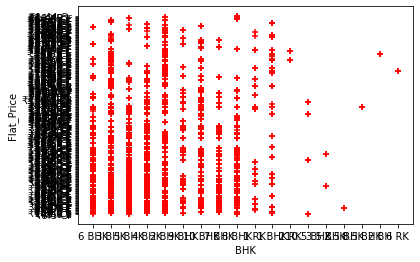

In [45]:
%matplotlib inline
plt.xlabel('BHK')
plt.ylabel('Flat_Price')
plt.scatter(df2.BHK,df2.Flat_Price,color='red',marker='+');

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [56]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

ValueError: ignored